#### Introduction

In [35]:
import pandas as pd
import numpy as np
import zipfile
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from scipy.stats import chi2_contingency
import plotly.graph_objects as go
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
import math
from sklearn.datasets import make_blobs
from sklearn.cluster import DBSCAN
from sklearn.model_selection import train_test_split
from IPython.display import display, HTML
import matplotlib.ticker as ticker

In [36]:
zip_path = '../BD/Supermercado_onehot.zip' 
csv_filename = 'Supermercado_onehot.csv'

with zipfile.ZipFile(zip_path, 'r') as z:
    with z.open(csv_filename) as f:
        df = pd.read_csv(f)

In [37]:
display(HTML(df.to_html(max_rows=5, max_cols=200, notebook=True)))

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,max_order,order_number_group_21-40 order,order_number_group_41-60 order,order_number_group_61-80 order,order_number_group_81-100 order,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday,order_time_list_Dawn,order_time_list_Morning,order_time_list_Night,department_id,department_babies,department_bakery,department_beverages,department_breakfast,department_bulk,department_canned goods,department_dairy eggs,department_deli,department_dry goods pasta,department_frozen,department_household,department_international,department_meat seafood,department_missing,department_other,department_pantry,department_personal care,department_pets,department_produce,department_snacks,product_name_asian foods,product_name_baby accessories,product_name_baby bath body care,product_name_baby food formula,product_name_bakery desserts,product_name_baking ingredients,product_name_baking supplies decor,product_name_beauty,product_name_beers coolers,product_name_body lotions soap,product_name_bread,product_name_breakfast bakery,product_name_breakfast bars pastries,product_name_bulk dried fruits vegetables,product_name_bulk grains rice dried goods,product_name_buns rolls,product_name_butter,product_name_candy chocolate,product_name_canned fruit applesauce,product_name_canned jarred vegetables,product_name_canned meals beans,product_name_canned meat seafood,product_name_cat food care,product_name_cereal,product_name_chips pretzels,product_name_cleaning products,product_name_cocoa drink mixes,product_name_coffee,product_name_cold flu allergy,product_name_condiments,product_name_cookies cakes,product_name_crackers,product_name_cream,product_name_deodorants,product_name_diapers wipes,product_name_digestion,product_name_dish detergents,product_name_dog food care,product_name_doughs gelatins bake mixes,product_name_dry pasta,product_name_eggs,product_name_energy granola bars,product_name_energy sports drinks,product_name_eye ear care,product_name_facial care,product_name_feminine care,product_name_first aid,product_name_food storage,product_name_fresh dips tapenades,product_name_fresh fruits,product_name_fresh herbs,product_name_fresh pasta,product_name_fresh vegetables,product_name_frozen appetizers sides,product_name_frozen breads doughs,product_name_frozen breakfast,product_name_frozen dessert,product_name_frozen juice,product_name_frozen meals,product_name_frozen meat seafood,product_name_frozen pizza,product_name_frozen produce,product_name_frozen vegan vegetarian,product_name_fruit vegetable snacks,product_name_grains rice dried goods,product_name_granola,product_name_hair care,product_name_honeys syrups nectars,product_name_hot cereal pancake mixes,product_name_hot dogs bacon sausage,product_name_ice cream ice,product_name_ice cream toppings,product_name_indian foods,product_name_instant foods,product_name_juice nectars,product_name_kitchen supplies,product_name_kosher foods,product_name_latino foods,product_name_laundry,product_name_lunch meat,product_name_marinades meat preparation,product_name_meat counter,product_name_milk,product_name_mint gum,product_name_missing,product_name_more household,product_name_muscles joints pain relief,product_name_nuts seeds dried fruit,product_name_oils vinegars,product_name_oral hygiene,product_name_other,product_name_other creams cheeses,product_name_packaged cheese,product_name_packaged meat,product_name_packaged poultry,product_name_packaged produce,product_name_packaged seafood,product_name_packaged vegetables fruits,product_name_paper goods,product_name_pasta sauce,product_name_pickled goods olives,product_name_plates bowls cups flatware,product_name_popcorn jerky,product_name_poultry counter,product_name_prepared meals,product_name_prepared soups salads,product_name_preserved dips spreads,product_name_protein meal replacements,product_name_red wines,product_name_refrigerated

In [38]:
df = df.drop('department_id', axis=1)

In [44]:
column_names = ['order_id', 'user_id', 'order_number', 'order_dow', 'order_hour_of_day', 
                'days_since_prior_order', 'product_id', 'add_to_cart_order', 'reordered', 
                'max_order', 'order_number_group_21-40 order', 'order_number_group_41-60 order',
                'order_number_group_61-80 order', 'order_number_group_81-100 order', 
                'day_Monday', 'day_Saturday', 'day_Sunday', 'day_Thursday', 'day_Tuesday', 
                'day_Wednesday', 'order_time_list_Dawn', 'order_time_list_Morning', 
                'order_time_list_Night', 'department_babies', 'department_bakery', 
                'department_beverages', 'department_breakfast', 'department_bulk', 
                'department_canned goods', 'department_dairy eggs', 'department_deli', 
                'department_dry goods pasta', 'department_frozen', 'department_household', 
                'department_international', 'department_meat seafood', 'department_missing', 
                'department_other', 'department_pantry', 'department_personal care', 
                'department_pets', 'department_produce', 'department_snacks', 
                'product_name_asian foods', 'product_name_baby accessories', 
                'product_name_baby bath body care', 'product_name_baby food formula', 
                'product_name_bakery desserts', 'product_name_baking ingredients', 
                'product_name_baking supplies decor', 'product_name_beauty']

department_columns = [col for col in column_names if col.startswith('department')]

print(department_columns)

['department_babies', 'department_bakery', 'department_beverages', 'department_breakfast', 'department_bulk', 'department_canned goods', 'department_dairy eggs', 'department_deli', 'department_dry goods pasta', 'department_frozen', 'department_household', 'department_international', 'department_meat seafood', 'department_missing', 'department_other', 'department_pantry', 'department_personal care', 'department_pets', 'department_produce', 'department_snacks']


#### Clustering - K-Means

c:\Users\marti\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\marti\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\marti\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\marti\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\clus

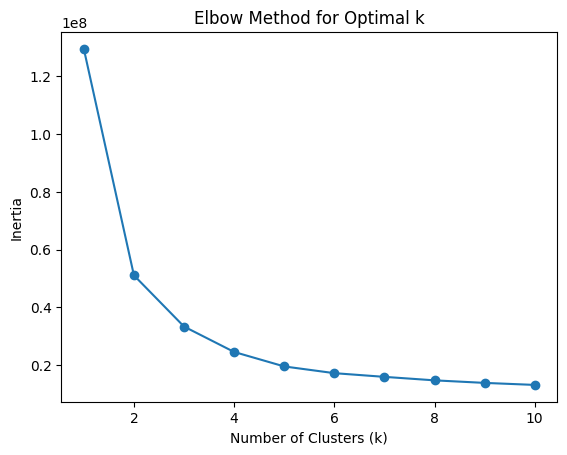

In [45]:
X = df[['department_babies', 'department_bakery', 'department_beverages', 'department_breakfast', 'department_bulk', 
        'department_canned goods', 'department_dairy eggs', 'department_deli', 
        'department_dry goods pasta', 'department_frozen', 'department_household', 
        'department_international', 'department_meat seafood', 'department_missing', 
        'department_other', 'department_pantry', 'department_personal care', 
        'department_pets', 'department_produce', 'department_snacks', 'max_order', 'order_hour_of_day', 'days_since_prior_order']]

inertia_values = []

for n_clusters in range(1, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(X)
    inertia_values.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia_values, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

c:\Users\marti\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


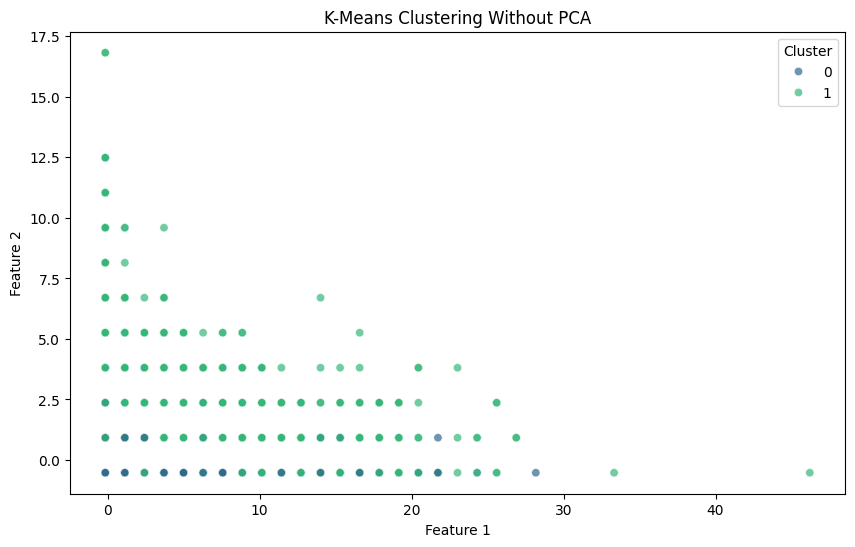

In [46]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

n_clusters = 2

kmeans1 = KMeans(n_clusters=n_clusters, random_state=100)
labels = kmeans1.fit_predict(X_scaled)

df_c1 = pd.DataFrame(X_scaled, columns=[f'Feature_{i+1}' for i in range(X.shape[1])])
df_c1['Cluster'] = labels

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Feature_1', y='Feature_2', hue='Cluster', data=df_c1, palette='viridis', alpha=0.7)
plt.title('K-Means Clustering Without PCA')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(title='Cluster')
plt.show()

In [42]:
df['Clusters_1'] = kmeans1.labels_

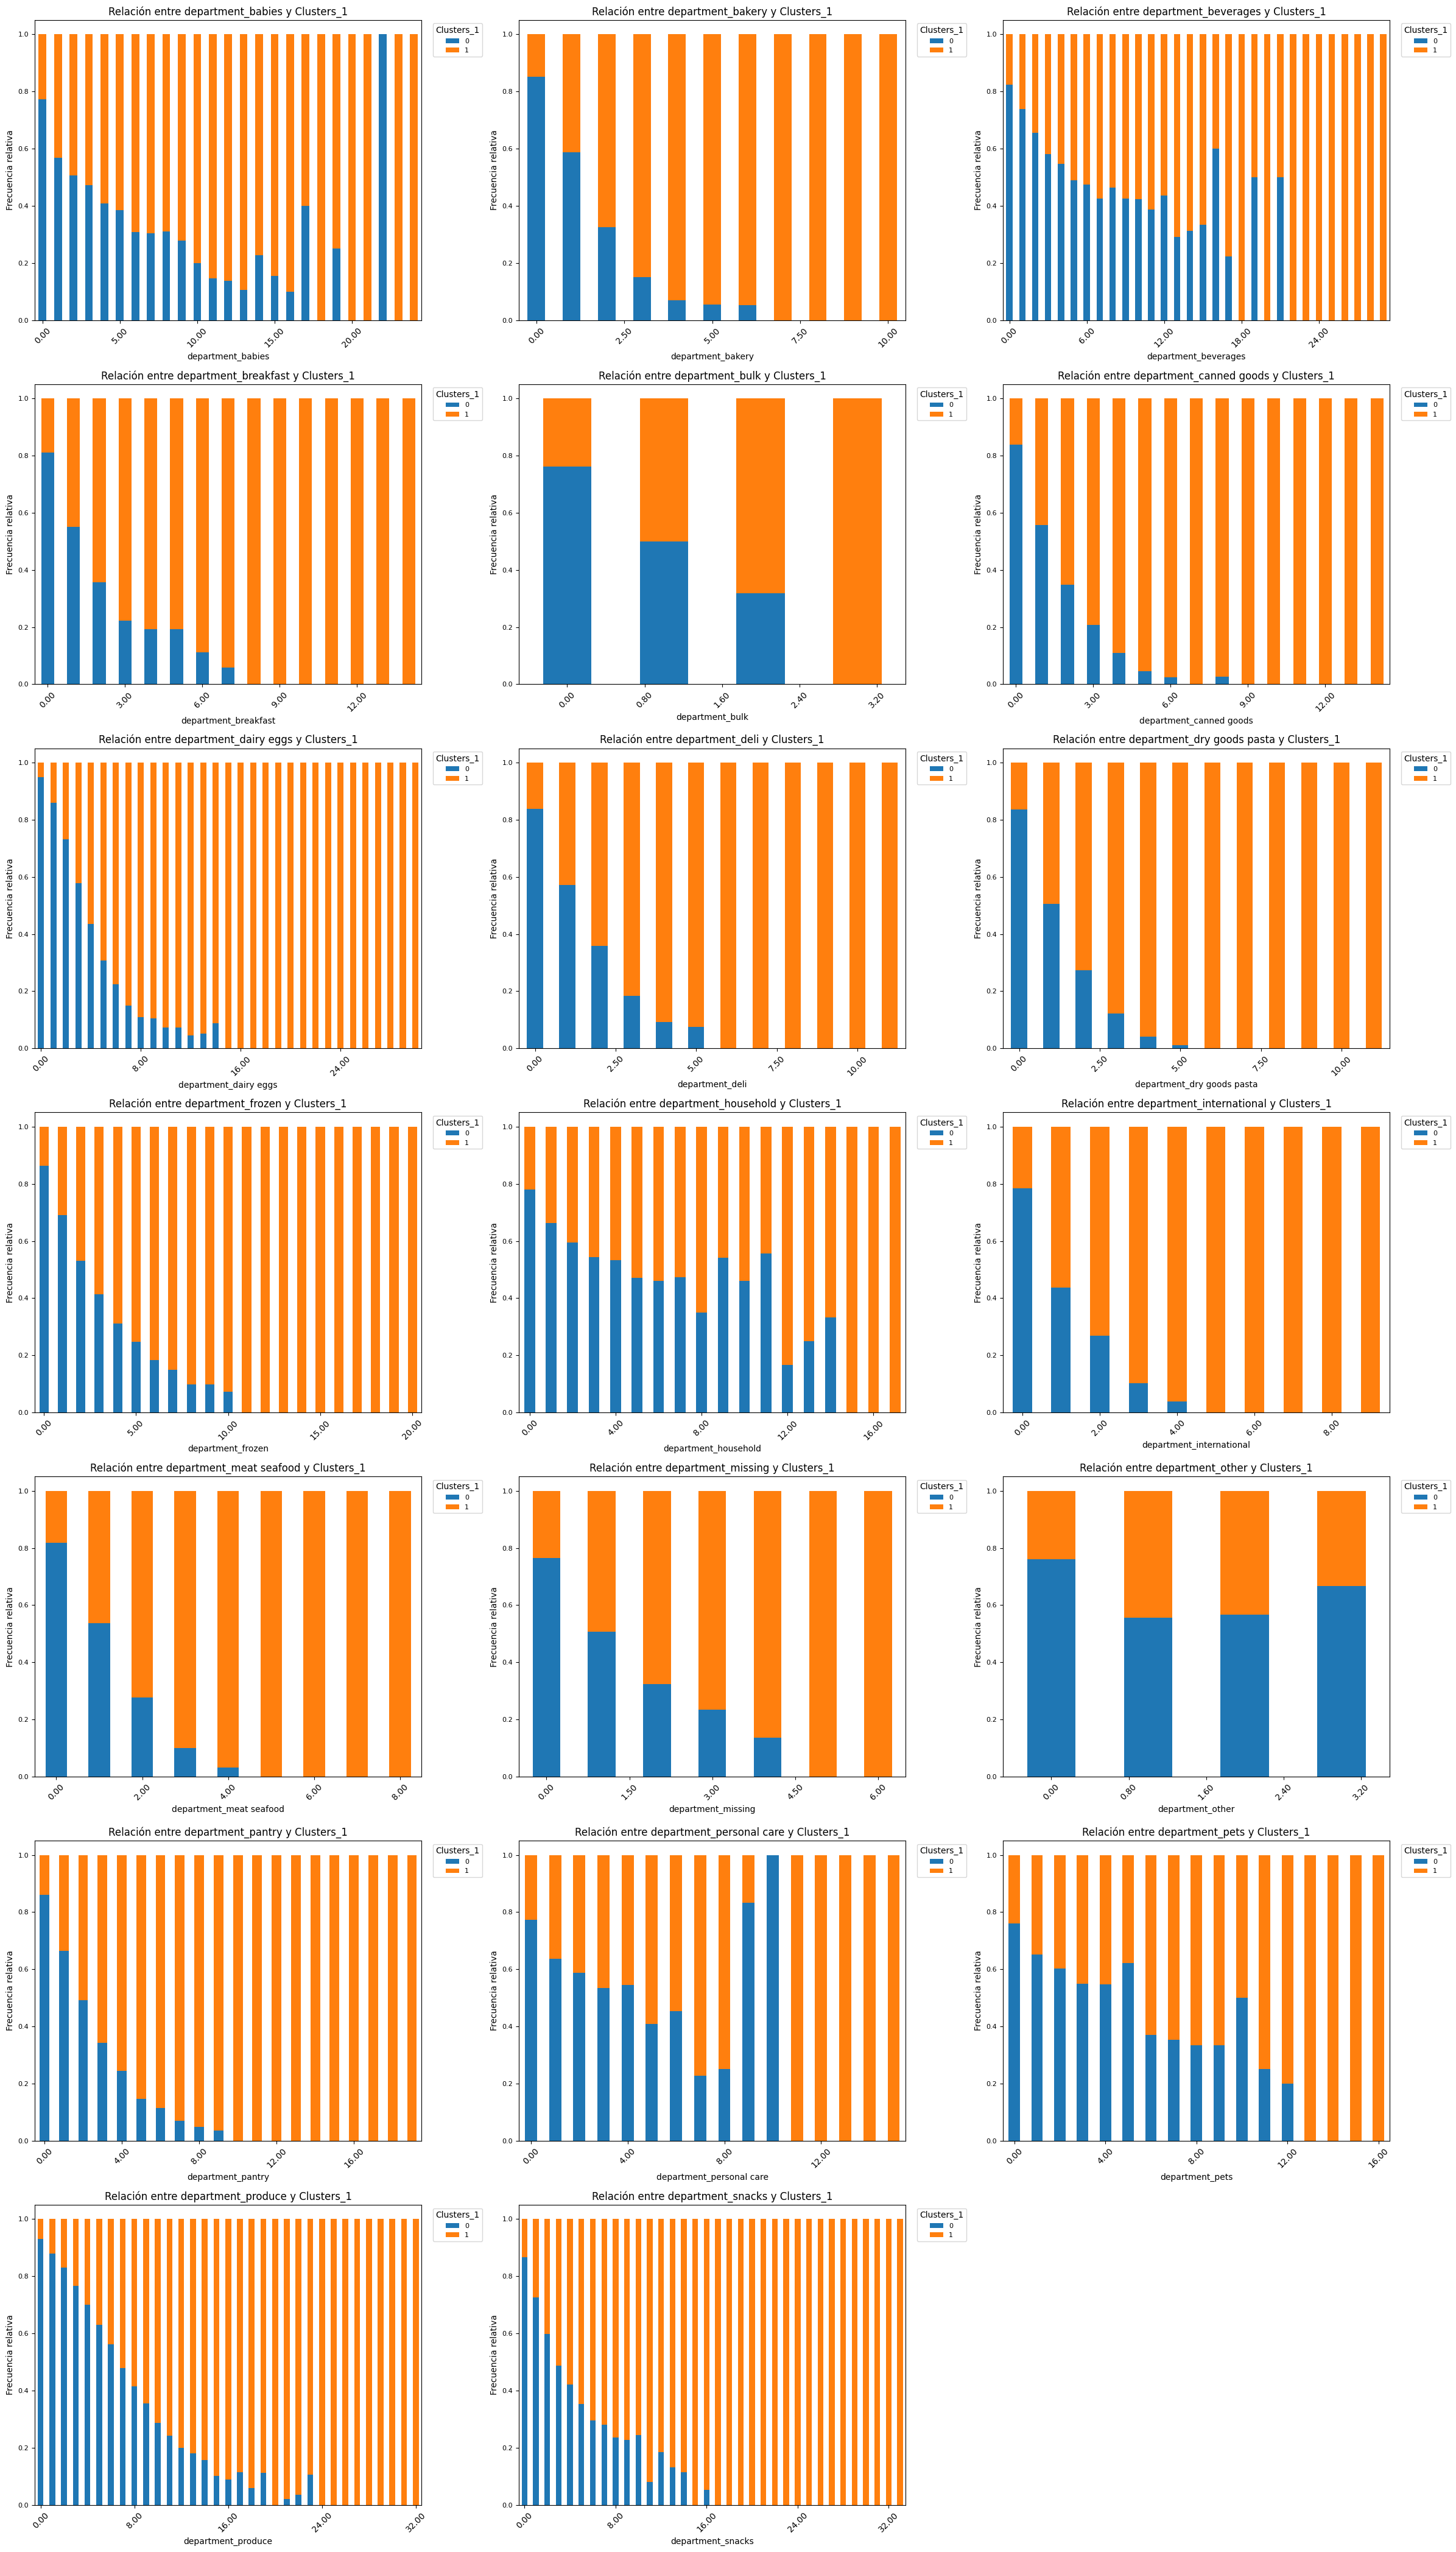

In [47]:
department_columns = [col for col in df.columns if col.startswith('department')]

num_rows = 7
num_cols = 3

fig, axs = plt.subplots(num_rows, num_cols, figsize=(8 * num_cols, 6 * num_rows))

for i, columna in enumerate(department_columns):
    if i >= num_rows * num_cols:
        break
    
    row = i // num_cols
    col = i % num_cols

    frecuencias = df.groupby(columna)['Clusters_1'].value_counts(normalize=True).unstack()
    frecuencias.plot(kind='bar', stacked=True, ax=axs[row, col])
    
    axs[row, col].set_title(f'Relación entre {columna} y Clusters_1', fontsize=12)
    axs[row, col].set_xlabel(columna, fontsize=10)
    axs[row, col].set_ylabel('Frecuencia relativa', fontsize=10)
    axs[row, col].tick_params(axis='x', rotation=45, labelsize=10)
    axs[row, col].tick_params(axis='y', labelsize=8)

    axs[row, col].legend(title='Clusters_1', fontsize=8, bbox_to_anchor=(1.02, 1), loc='upper left')
    
    axs[row, col].xaxis.set_major_locator(ticker.MaxNLocator(5))
    axs[row, col].xaxis.set_major_formatter(ticker.FormatStrFormatter('%.2f'))

for j in range(i + 1, num_rows * num_cols):
    fig.delaxes(axs[j // num_cols, j % num_cols])

plt.tight_layout()
plt.show()


In [49]:
for columna in department_columns:
    print(f"\nAnálisis de la columna: {columna}")
    print(df.groupby('Clusters_1')[columna].mean())


Análisis de la columna: department_babies
Clusters_1
0    0.072116
1    0.316214
Name: department_babies, dtype: float64

Análisis de la columna: department_bakery
Clusters_1
0    0.211892
1    0.842256
Name: department_bakery, dtype: float64

Análisis de la columna: department_beverages
Clusters_1
0    0.693146
1    1.308469
Name: department_beverages, dtype: float64

Análisis de la columna: department_breakfast
Clusters_1
0    0.126600
1    0.521883
Name: department_breakfast, dtype: float64

Análisis de la columna: department_bulk
Clusters_1
0    0.007020
1    0.022818
Name: department_bulk, dtype: float64

Análisis de la columna: department_canned goods
Clusters_1
0    0.161287
1    0.855788
Name: department_canned goods, dtype: float64

Análisis de la columna: department_dairy eggs
Clusters_1
0    1.148293
1    3.378991
Name: department_dairy eggs, dtype: float64

Análisis de la columna: department_deli
Clusters_1
0    0.186797
1    0.755891
Name: department_deli, dtype: float64


Con base en el análisis del Paso 1: Análisis de perfiles de clústeres, aquí tienes las conclusiones derivadas de los resultados obtenidos:

Distribución de categorías clave por clúster:

department_babies: La representación es mayor en el clúster 1 (0.32) en comparación con el clúster 0 (0.07), sugiriendo que el clúster 1 está compuesto por clientes que compran más productos relacionados con bebés.
department_produce: Este es uno de los departamentos más comprados en ambos clústeres, pero especialmente en el clúster 1 con una media de 5.47, muy superior al 2.15 del clúster 0. Implica una alta afinidad hacia productos frescos en el clúster 1.
Diferencias en el consumo por clúster:

Se observa un patrón consistente en el que el clúster 1 tiende a tener un promedio más alto en casi todas las categorías, lo que sugiere que este grupo de clientes tiene un comportamiento de compra más variado y posiblemente un ticket de compra más alto.
Por ejemplo, los departamentos de panadería (department_bakery), lácteos y huevos (department_dairy eggs), y bebidas (department_beverages) tienen una mayor representación en el clúster 1. Esto podría indicar una preferencia por alimentos perecederos y productos más especializados.
Preferencias destacadas en el clúster 0:

Aunque el clúster 0 tiene valores promedio más bajos en la mayoría de las categorías, sigue mostrando compras notables en department_produce y department_beverages, lo cual podría representar un segmento de clientes que realizan compras más sencillas, pero enfocadas en productos frescos y básicos.
Oportunidades de segmentación:

El clúster 1 podría corresponder a clientes más frecuentes o con mayor poder adquisitivo, mientras que el clúster 0 podría representar un grupo con hábitos de compra más esporádicos o limitados a ciertos departamentos clave.
Este análisis de perfiles de clústeres es útil para identificar estrategias de marketing personalizadas, segmentación de clientes y optimización del inventario para maximizar las ventas basadas en las preferencias de cada grupo.

In [56]:
stats_formatted = stats.style.format("{:.2f}").set_caption("Cluster Statistics").set_properties(**{
    'text-align': 'center'}).set_table_styles([{
    'selector': 'caption',
    'props': 'caption-side: top; font-size:16px; font-weight:bold; text-align:center;'
}])

stats_formatted

,"('order_id', 'mean')","('order_id', 'median')","('user_id', 'mean')","('user_id', 'median')","('order_number', 'mean')","('order_number', 'median')","('order_dow', 'mean')","('order_dow', 'median')","('order_hour_of_day', 'mean')","('order_hour_of_day', 'median')","('days_since_prior_order', 'mean')","('days_since_prior_order', 'median')","('product_id', 'mean')","('product_id', 'median')","('add_to_cart_order', 'mean')","('add_to_cart_order', 'median')","('reordered', 'mean')","('reordered', 'median')","('max_order', 'mean')","('max_order', 'median')","('order_number_group_21-40 order', 'mean')","('order_number_group_21-40 order', 'median')","('order_number_group_41-60 order', 'mean')","('order_number_group_41-60 order', 'median')","('order_number_group_61-80 order', 'mean')","('order_number_group_61-80 order', 'median')","('order_number_group_81-100 order', 'mean')","('order_number_group_81-100 order', 'median')","('day_Monday', 'mean')","('day_Monday', 'median')","('day_Saturday', 'mean')","('day_Saturday', 'median')","('day_Sunday', 'mean')","('day_Sunday', 'median')","('day_Thursday', 'mean')","('day_Thursday', 'median')","('day_Tuesday', 'mean')","('day_Tuesday', 'median')","('day_Wednesday', 'mean')","('day_Wednesday', 'median')","('order_time_list_Dawn', 'mean')","('order_time_list_Dawn', 'median')","('order_time_list_Morning', 'mean')","('order_time_list_Morning', 'median')","('order_time_list_Night', 'mean')","('order_time_list_Night', 'median')","('department_babies', 'mean')","('department_babies', 'median')","('department_bakery', 'mean')","('department_bakery', 'median')","('department_beverages', 'mean')","('department_beverages', 'median')","('department_breakfast', 'mean')","('department_breakfast', 'median')","('department_bulk', 'mean')","('department_bulk', 'median')","('department_canned goods', 'mean')","('department_canned goods', 'median')","('department_dairy eggs', 'mean')","('department_dairy eggs', 'median')","('department_deli', 'mean')","('department_deli', 'median')","('department_dry goods pasta', 'mean')","('department_dry goods pasta', 'median')","('department_frozen', 'mean')","('department_frozen', 'median')","('department_household', 'mean')","('department_household', 'median')","('department_international', 'mean')","('department_international', 'median')","('department_meat seafood', 'mean')","('department_meat seafood', 'median')","('department_missing', 'mean')","('department_missing', 'median')","('department_other', 'mean')","('department_other', 'median')","('department_pantry', 'mean')","('department_pantry', 'median')","('department_personal care', 'mean')","('department_personal care', 'median')","('department_pets', 'mean')","('department_pets', 'median')","('department_produce', 'mean')","('department_produce', 'median')","('department_snacks', 'mean')","('department_snacks', 'median')","('product_name_asian foods', 'mean')","('product_name_asian foods', 'median')","('product_name_baby accessories', 'mean')","('product_name_baby accessories', 'median')","('product_name_baby bath body care', 'mean')","('product_name_baby bath body care', 'median')","('product_name_baby food formula', 'mean')","('product_name_baby food formula', 'median')","('product_name_bakery desserts', 'mean')","('product_name_bakery desserts', 'median')","('product_name_baking ingredients', 'mean')","('product_name_baking ingredients', 'median')","('product_name_baking supplies decor', 'mean')","('product_name_baking supplies decor', 'median')","('product_name_beauty', 'mean')","('product_name_beauty', 'median')","('product_name_beers coolers', 'mean')","('product_name_beers coolers', 'median')","('product_name_body lotions soap', 'mean')","('product_name_body lotions soap', 'median')","('product_name_bread', 'mean')","('product_name_bread', 'median')","('product_name_breakfast bakery', 'mean')","('product_name_breakfast bakery', 'median')","('product_name_breakfast bars pastries', 'mean')","('product_name_

Distribución de Ordenes y Usuarios:

Los clústeres muestran diferencias en el número promedio de órdenes (order_id_mean) y usuarios (user_id_mean). Esto sugiere que algunos clústeres contienen usuarios que realizan compras más frecuentes o más altas en volumen.
El promedio y la mediana en ambas métricas son similares, lo que indica una distribución posiblemente simétrica en el comportamiento de los usuarios dentro de cada clúster.
Frecuencia y Horas de Compra:
En cuanto al día (order_dow) y la hora del día (order_hour_of_day) de las órdenes, se observa que ambos clústeres tienden a realizar compras durante horarios similares (alrededor de las 13:00 horas) y en días parecidos.
Aunque hay una ligera diferencia en el día de la semana preferido, las variaciones no son muy significativas. Esto sugiere patrones de compra estables a lo largo de la semana entre los clústeres.
Preferencias de Productos:

En las variables categóricas de productos, como product_name_spreads_mode o product_name_vitamins supplements_mode, los valores de moda son todos cero, lo que indica que estos productos no son particularmente populares en ninguno de los clústeres.
Es probable que estos productos representen categorías minoritarias o productos que no son de compra recurrente para la mayoría de los usuarios en este análisis.
Variabilidad en la Demanda:

La pequeña diferencia en el promedio de order_number_mean entre los clústeres sugiere que hay una ligera variación en el número de órdenes realizadas por cada usuario en diferentes clústeres. Los usuarios en el primer clúster parecen realizar menos pedidos en promedio que aquellos en el segundo clúster.
Esto podría indicar diferentes perfiles de clientes, donde un clúster tiene clientes con patrones de compra más frecuentes, mientras que el otro está compuesto por clientes más esporádicos.

Los clústeres parecen diferenciarse más en términos de volumen de órdenes y frecuencia de compras, mientras que no hay una preferencia marcada por categorías de productos específicos. Esto indica que los clústeres se pueden utilizar para crear estrategias de segmentación basadas en la frecuencia y volumen de compra, en lugar de preferencias de productos específicos.

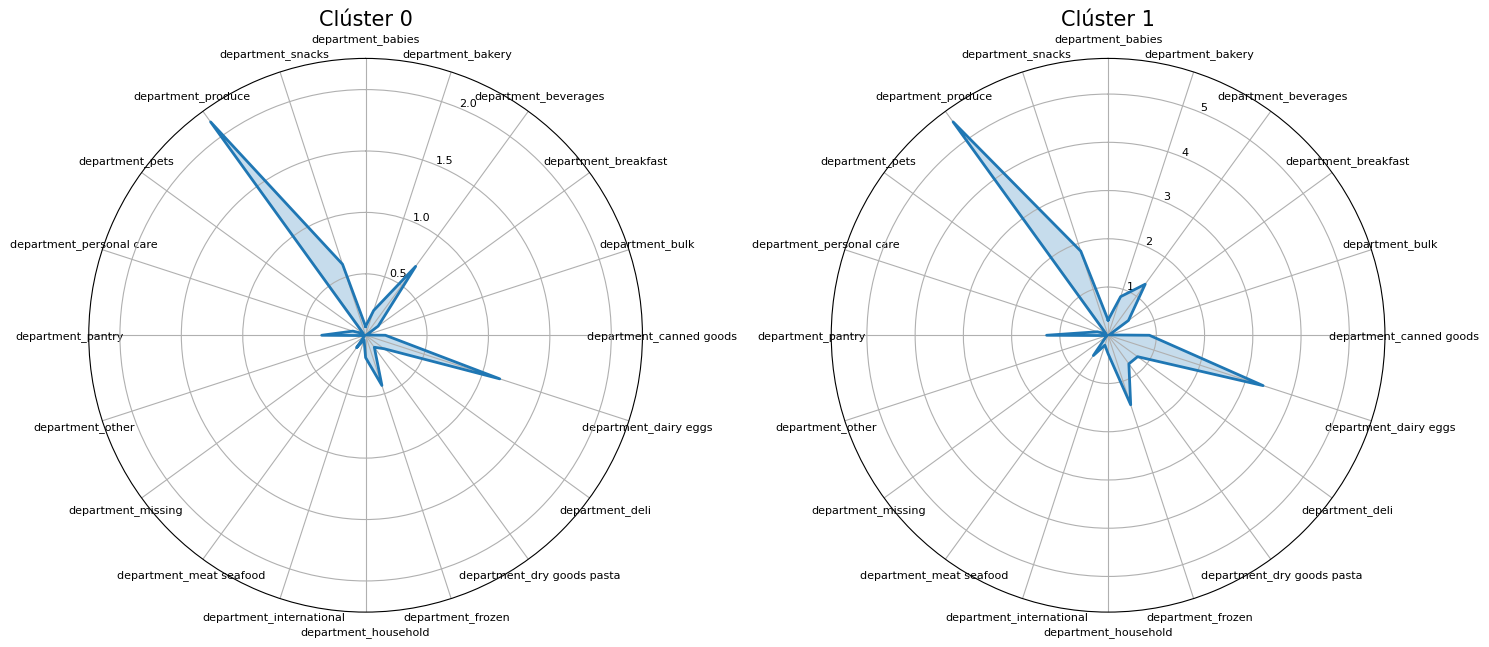

In [57]:
num_clusters = df['Clusters_1'].nunique()
categories = department_columns

fig, axes = plt.subplots(1, num_clusters, subplot_kw={'polar': True}, figsize=(15, 7))

for i, cluster in enumerate(df['Clusters_1'].unique()):
    values = df[df['Clusters_1'] == cluster][categories].mean().values.flatten().tolist()
    values += values[:1]  # Cerrar el gráfico de radar
    angles = np.linspace(0, 2 * np.pi, len(categories), endpoint=False).tolist()
    angles += angles[:1]
    
    ax = axes[i] if num_clusters > 1 else axes
    ax.set_theta_offset(np.pi / 2)
    ax.set_theta_direction(-1)
    
    ax.plot(angles, values, linewidth=2, linestyle='solid')
    ax.fill(angles, values, alpha=0.25)
    ax.set_title(f'Clúster {cluster}', size=15)
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories, fontsize=8)
    ax.tick_params(axis='y', labelsize=8)

plt.tight_layout()
plt.show()

Preferencia en el Departamento de "Produce":
Ambos clústeres muestran una preferencia destacada por el departamento de "Produce", pero es particularmente pronunciada en el clúster 1, donde este departamento tiene una mayor representación en comparación con otros.
Esto sugiere que el clúster 1 podría estar compuesto por usuarios que compran más productos frescos o que tienen hábitos de consumo más orientados hacia alimentos naturales.

Consumo en Otros Departamentos:
En ambos clústeres, la representación en la mayoría de los otros departamentos es baja en comparación con "Produce". Sin embargo, el clúster 1 muestra un consumo algo mayor en los departamentos de "Beverages", "Breakfast", y "Canned Goods" en comparación con el clúster 0.
Esto podría indicar que los usuarios en el clúster 1 tienen una tendencia a diversificar sus compras en varias categorías, mientras que el clúster 0 parece más concentrado en unos pocos departamentos.

Diferencias en Categorías Específicas:
El clúster 1 tiene una representación superior en el departamento de "Beverages" (bebidas) y "Breakfast" (desayuno), lo que podría indicar un perfil de consumidores que se enfocan en productos de consumo diario o habitual.
El clúster 0, en cambio, parece tener una representación más uniforme y baja en esas categorías, lo cual podría sugerir que los usuarios en este clúster realizan compras más específicas y menos diversificadas en estos departamentos.
Otros Departamentos con Baja Representación:
Algunos departamentos, como "Meat Seafood", "Frozen", "Household", y "International", tienen una representación mínima o nula en ambos clústeres. Esto podría indicar que estos productos no son particularmente populares o que no forman una parte central de las compras típicas de los usuarios en estos clústeres.

Conclusiones Generales
Clúster 0: Este grupo parece estar menos diversificado en sus preferencias de compra y tiene un consumo concentrado en unos pocos departamentos. Los usuarios en este clúster pueden tener un enfoque de compra más específico.
Clúster 1: Los usuarios en este grupo muestran un patrón de compra más variado, con un interés mayor en productos frescos, bebidas, y artículos para el desayuno. Esto puede reflejar un perfil de consumidor que busca opciones para el consumo diario o que realiza compras más equilibradas en distintas categorías.

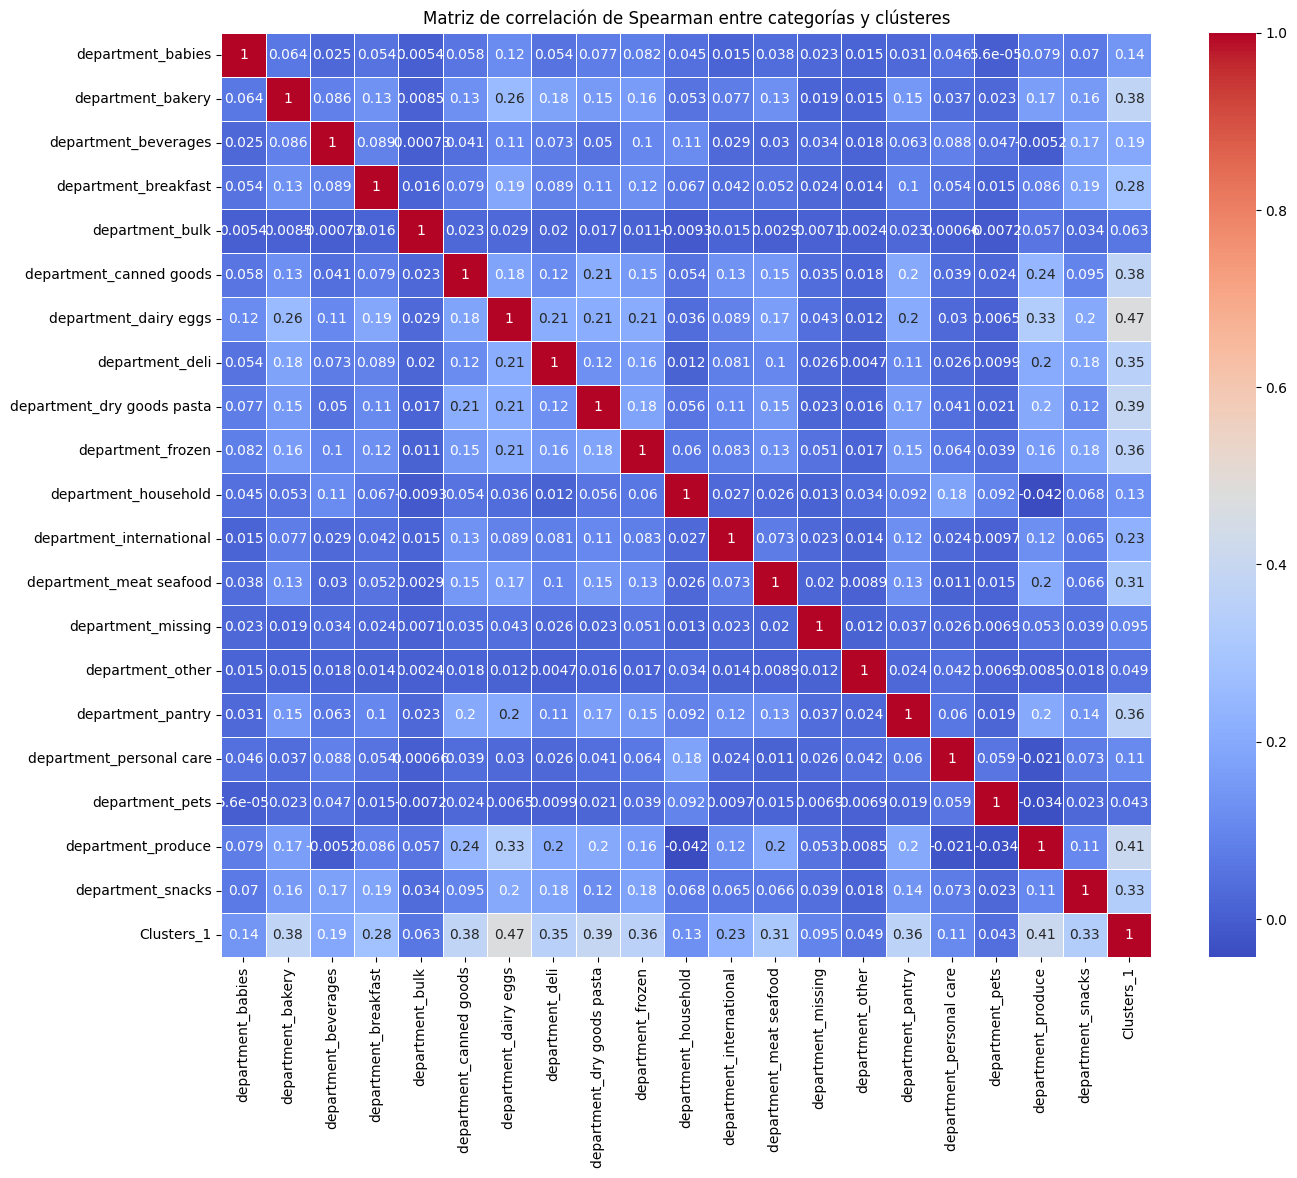

In [54]:
correlations = df[department_columns + ['Clusters_1']].corr(method='spearman')

plt.figure(figsize=(15, 12))
sns.heatmap(correlations, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de correlación de Spearman entre categorías y clústeres')
plt.show()

Correlaciones entre Departamentos:

department_canned goods y department_bulk: Con una correlación alta (0.79), estos departamentos parecen estar asociados, lo que indica que los consumidores que compran productos enlatados también tienden a comprar productos a granel. Esta relación puede reflejar un patrón de compras de abastecimiento o almacenamiento.

department_household y department_international: La correlación de 0.92 entre estos dos departamentos indica que los consumidores que compran productos para el hogar también están interesados en productos internacionales, lo cual podría ser característico de compradores que buscan variedad o productos especializados.

department_deli y department_dairy eggs: Tienen una correlación de 0.82, lo que puede sugerir que los consumidores que compran productos frescos de delicatessen también buscan productos lácteos, lo cual es común en patrones de compras relacionadas con alimentos perecederos.

Las altas correlaciones entre ciertos departamentos, como canned goods y bulk, sugieren que estos productos pueden venderse en paquetes o promociones cruzadas. Esto podría atraer a consumidores que buscan abastecerse o comprar en grandes cantidades.

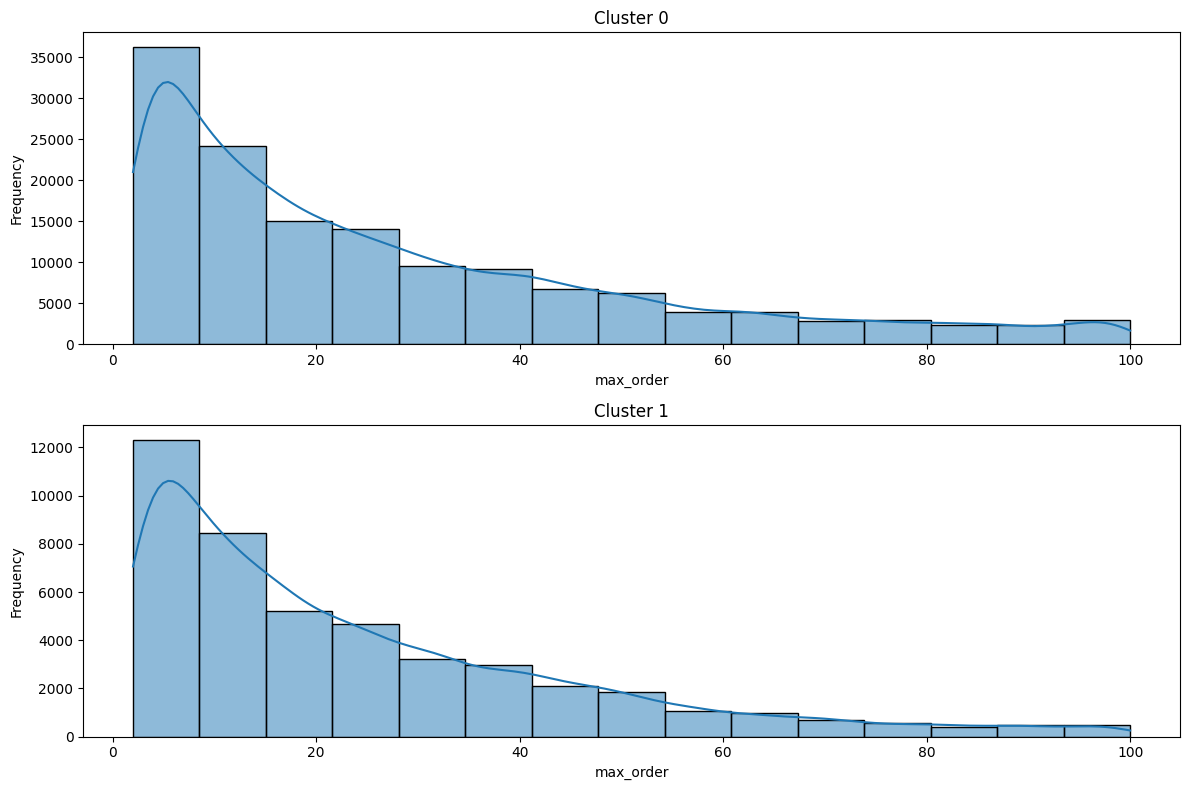

In [29]:
clusters_1 = df['Clusters_1'].unique()
n_clusters = len(clusters_1)

n_cols = 1
n_rows = math.ceil(n_clusters / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 8))

if n_rows == 1:
    axes = [axes]

for i, cluster in enumerate(clusters_1):
    sns.histplot(df[df['Clusters_1'] == cluster]['max_order'], kde=True, bins=15, ax=axes[i])
    axes[i].set_title(f'Cluster {cluster}')
    axes[i].set_xlabel('max_order')
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


Posible denominación de Clusters

Clúster 0: "Consumidores Generales o Ocasionales"

Este clúster no muestra correlaciones fuertes con categorías específicas, lo que sugiere que estos usuarios tienen un patrón de compra más diverso o menos definido. Podrían representar consumidores ocasionales que compran una variedad de productos sin una inclinación marcada hacia una categoría particular.
Clúster 1: "Consumidores de Productos Frescos y Snacks"

Este clúster presenta correlaciones positivas con categorías como produce, dairy eggs, y snacks, lo que indica una preferencia por productos frescos y de consumo rápido. Estos usuarios parecen buscar alimentos frescos y productos listos para consumir, lo cual puede reflejar un perfil de compradores frecuentes o que buscan opciones saludables y rápidas.

c:\Users\marti\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


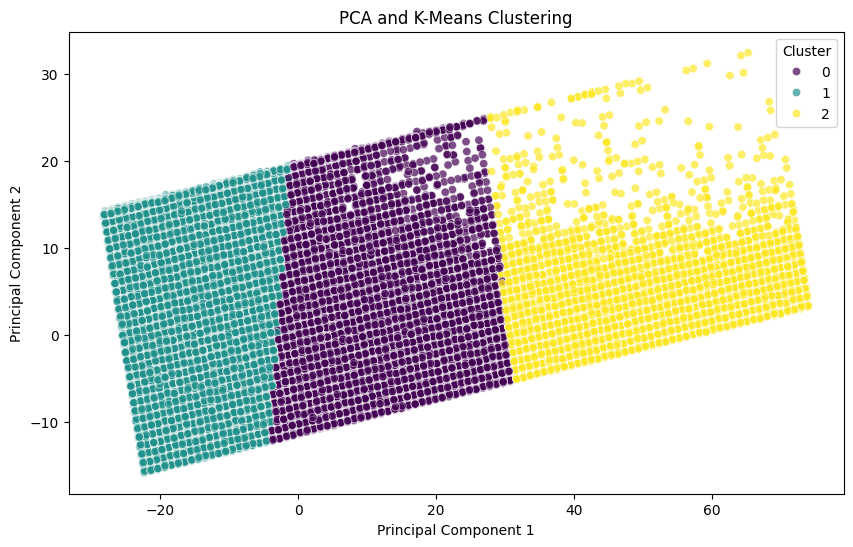

In [58]:
n_clusters = 3

kmeans2 = KMeans(n_clusters=n_clusters, random_state=100)
labels = kmeans2.fit_predict(X)

pca = PCA(n_components=2)
principal_components = pca.fit_transform(X)

df_c2 = pd.DataFrame(principal_components, columns=['PC1', 'PC2'])
df_c2['Cluster'] = labels

plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=df_c2, palette='viridis', alpha=0.7)
plt.title('PCA and K-Means Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()

In [61]:
df['Clusters_2'] = kmeans2.labels_

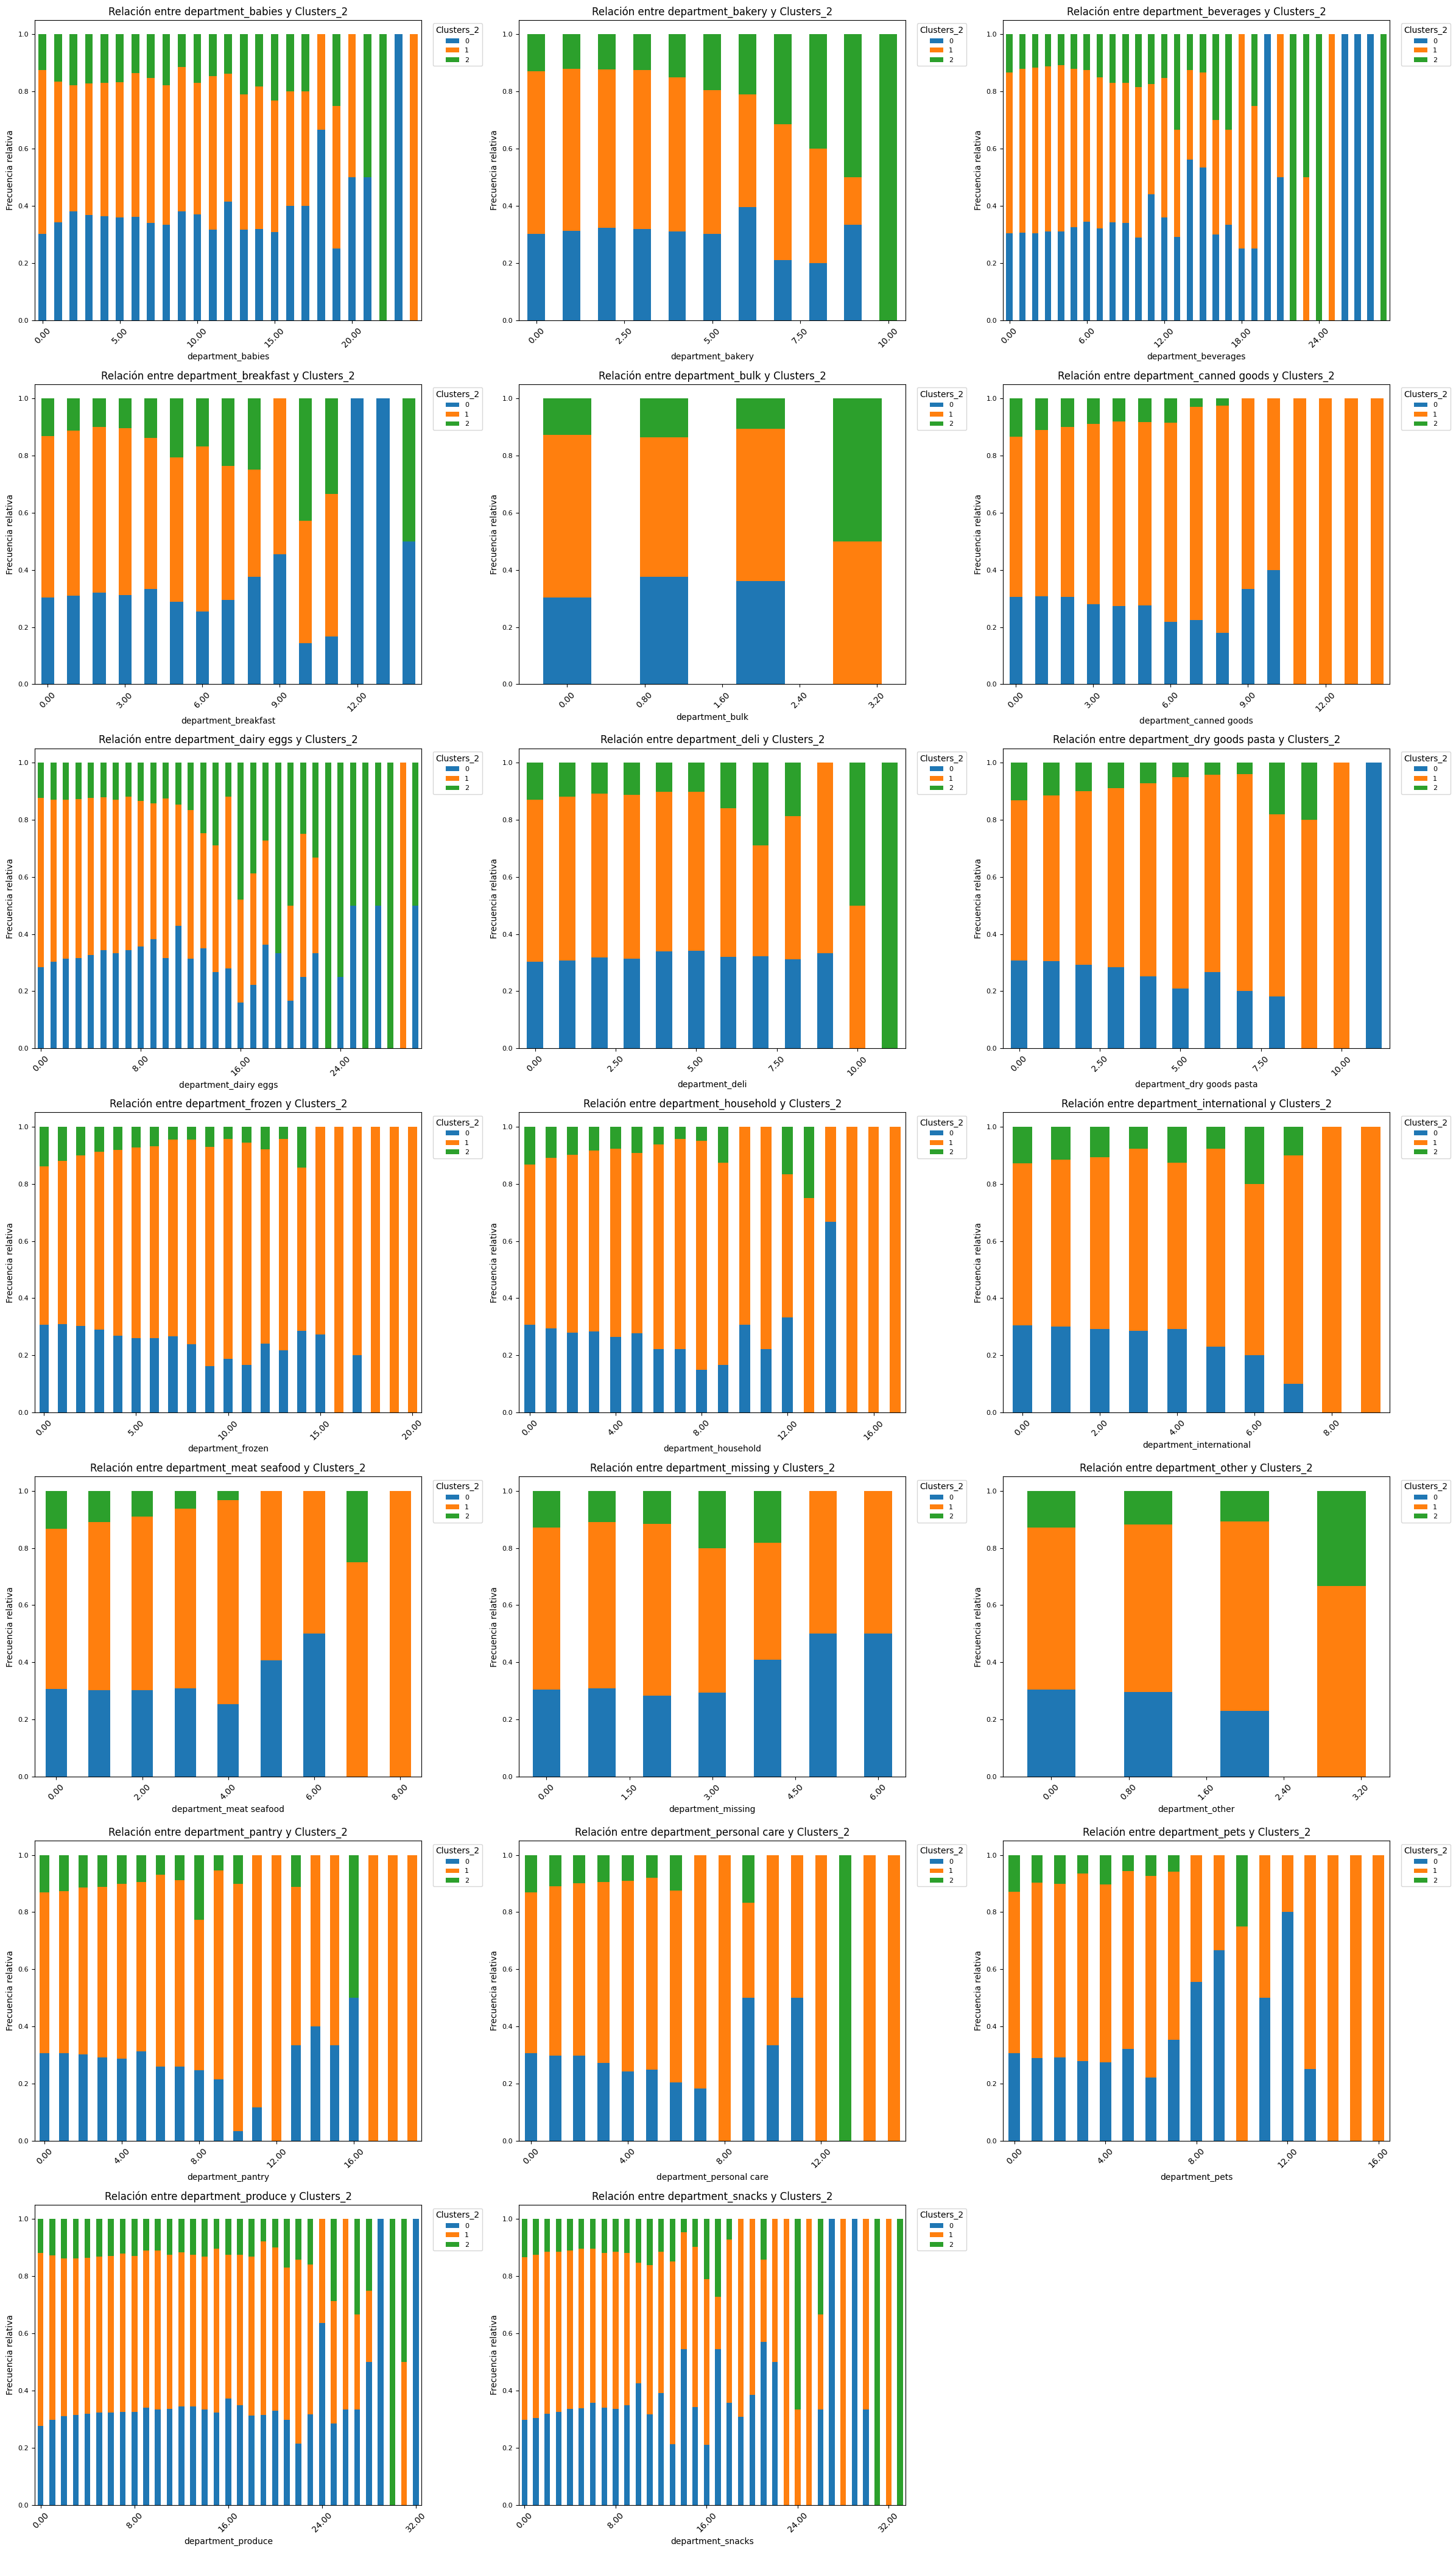

In [62]:
department_columns = [col for col in df.columns if col.startswith('department')]

num_rows = 7
num_cols = 3

fig, axs = plt.subplots(num_rows, num_cols, figsize=(8 * num_cols, 6 * num_rows))

for i, columna in enumerate(department_columns):
    if i >= num_rows * num_cols:
        break
    
    row = i // num_cols
    col = i % num_cols

    frecuencias = df.groupby(columna)['Clusters_2'].value_counts(normalize=True).unstack()
    frecuencias.plot(kind='bar', stacked=True, ax=axs[row, col])
    
    axs[row, col].set_title(f'Relación entre {columna} y Clusters_2', fontsize=12)
    axs[row, col].set_xlabel(columna, fontsize=10)
    axs[row, col].set_ylabel('Frecuencia relativa', fontsize=10)
    axs[row, col].tick_params(axis='x', rotation=45, labelsize=10)
    axs[row, col].tick_params(axis='y', labelsize=8)

    axs[row, col].legend(title='Clusters_2', fontsize=8, bbox_to_anchor=(1.02, 1), loc='upper left')
    
    axs[row, col].xaxis.set_major_locator(ticker.MaxNLocator(5))
    axs[row, col].xaxis.set_major_formatter(ticker.FormatStrFormatter('%.2f'))

for j in range(i + 1, num_rows * num_cols):
    fig.delaxes(axs[j // num_cols, j % num_cols])

plt.tight_layout()
plt.show()

c:\Users\marti\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


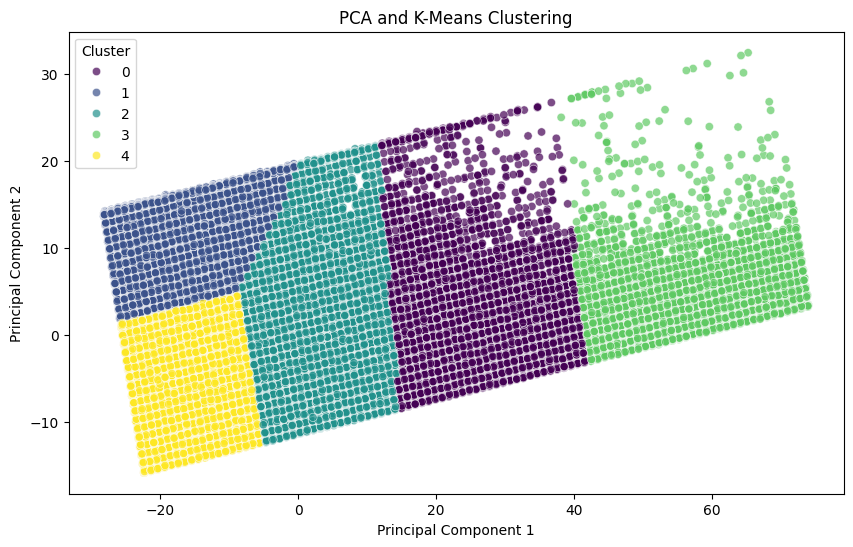

In [59]:
n_clusters = 5

kmeans3 = KMeans(n_clusters=n_clusters, random_state=100)
labels = kmeans3.fit_predict(X)

pca = PCA(n_components=2)
principal_components = pca.fit_transform(X)

df_c3 = pd.DataFrame(principal_components, columns=['PC1', 'PC2'])
df_c3['Cluster'] = labels

plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=df_c3, palette='viridis', alpha=0.7)
plt.title('PCA and K-Means Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()

In [60]:
df['Clusters_3'] = kmeans3.labels_

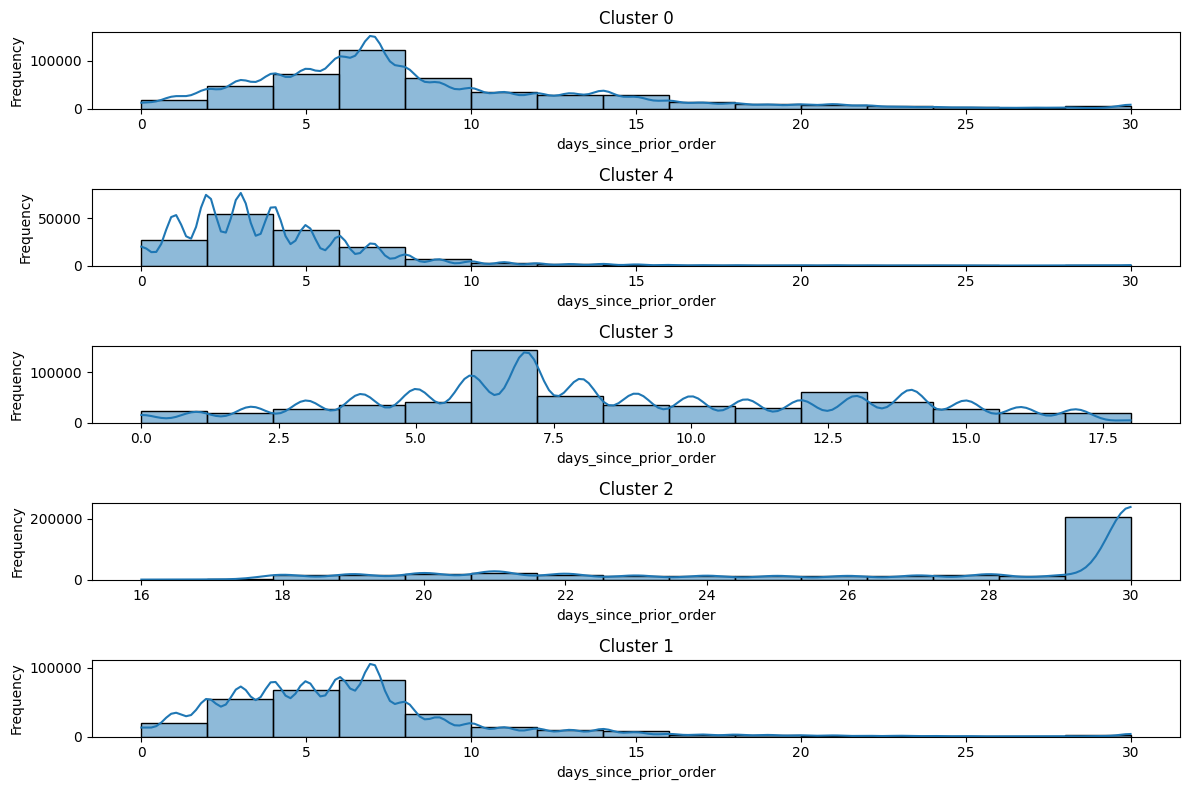

In [15]:
clusters_3 = df['Clusters_3'].unique()
n_clusters = len(clusters_3)

n_cols = 1
n_rows = math.ceil(n_clusters / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 8))

if n_rows == 1:
    axes = [axes]

for i, cluster in enumerate(clusters_3):
    sns.histplot(df[df['Clusters_3'] == cluster]['days_since_prior_order'], kde=True, bins=15, ax=axes[i])
    axes[i].set_title(f'Cluster {cluster}')
    axes[i].set_xlabel('days_since_prior_order')
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

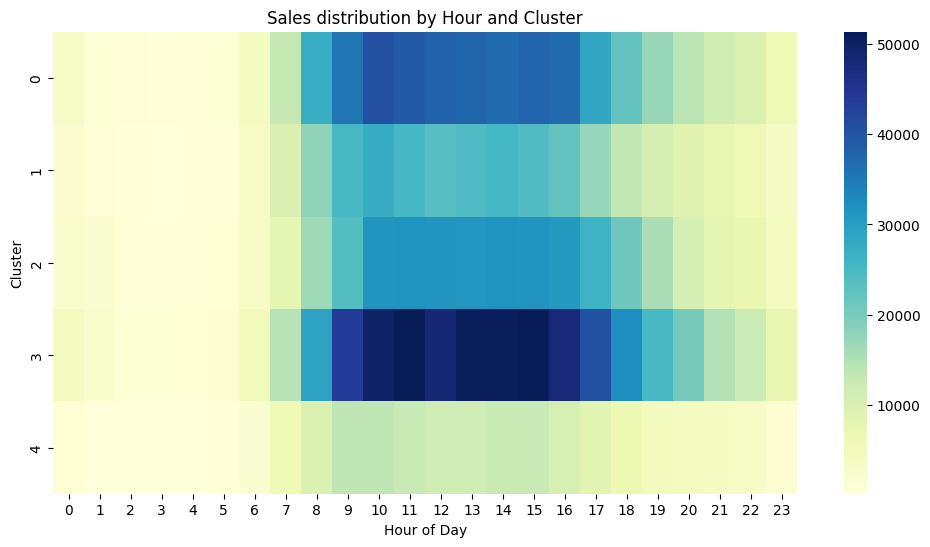

In [16]:
order_hour_counts = df.groupby(['Clusters_3', 'order_hour_of_day']).size().unstack()

plt.figure(figsize=(12, 6))
sns.heatmap(order_hour_counts, cmap='YlGnBu', annot=False)
plt.title('Sales distribution by Hour and Cluster')
plt.xlabel('Hour of Day')
plt.ylabel('Cluster')
plt.show()

##### Clustering using different variables

In [19]:
X2 = df[['max_order', 'order_hour_of_day', 'days_since_prior_order', 'reordered']]

In [ ]:
X_train = X2.values

kmeans4 = KMeans(n_clusters=5, random_state=2)
kmeans4.fit(X_train)

predictions = kmeans4.predict(X_train)

counts = np.bincount(predictions, minlength=5).reshape(1, 5)

countscldf = pd.DataFrame(counts, columns=["Cluster 0", "Cluster 1", "Cluster 2", "Cluster 3", "Cluster 4"])

countscldf

,Cluster 0,Cluster 1,Cluster 2,Cluster 3,Cluster 4
0,461611,300036,371979,152933,608600


Explained variance ratio (first two components): [0.87408324 0.0972555 ]


<Figure size 640x480 with 0 Axes>

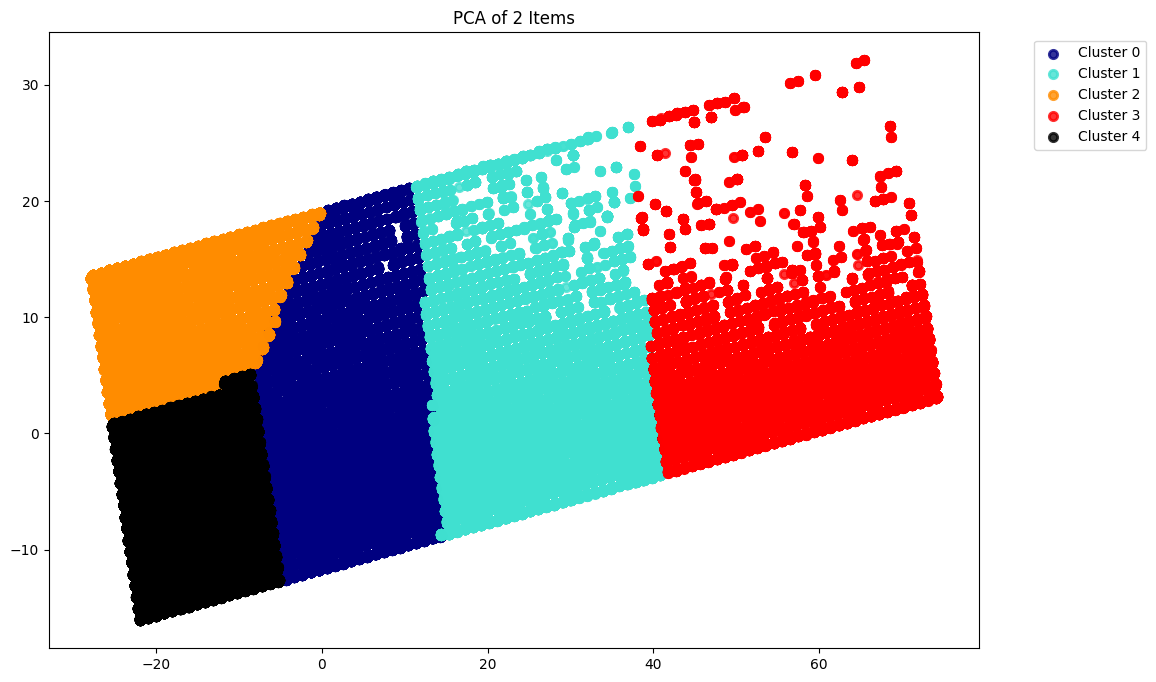

In [21]:
X = X_train
y_num = predictions

target_names = ["Cluster 0","Cluster 1","Cluster 2", "Cluster 3","Cluster 4"]

pca = PCA(n_components=2, random_state = 453)
X_r = pca.fit(X).transform(X)

print('Explained variance ratio (first two components): %s' % str(pca.explained_variance_ratio_))

plt.figure()
plt.figure(figsize=(12,8))
colors = ['navy', 'turquoise', 'darkorange', 'red', 'black']
lw = 2

for color, i, target_name in zip(colors, [0, 1, 2, 3,4], target_names):
    plt.scatter(X_r[y_num == i, 0], X_r[y_num == i, 1], color=color, alpha=.8, lw=lw,label=target_name)
    
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.6)   
plt.title('PCA of 2 Items')
plt.show()

In [22]:
df['Clusters_4'] = kmeans4.labels_

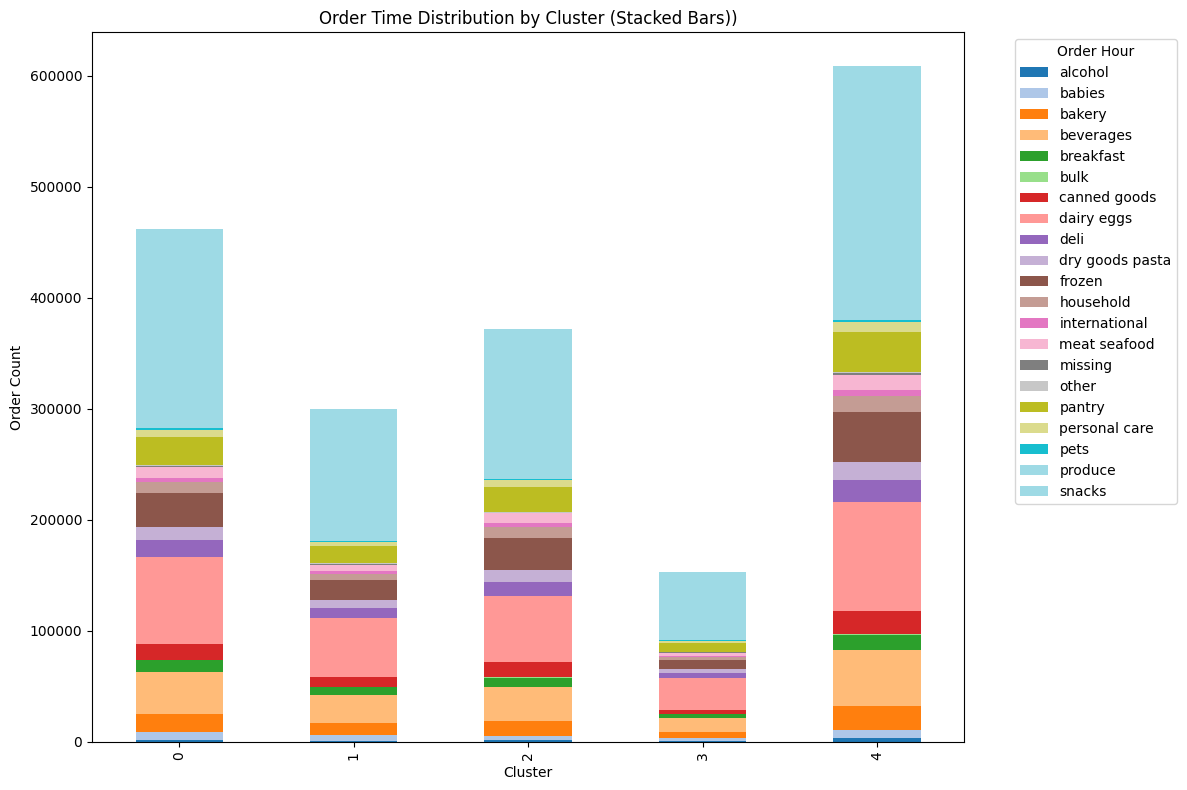

In [23]:
pivot_table = pd.crosstab(df['Clusters_4'], df['department'])
pivot_table.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='tab20')
plt.title('Order Time Distribution by Cluster (Stacked Bars))')
plt.xlabel('Cluster')
plt.ylabel('Order Count')
plt.legend(title='Order Hour', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

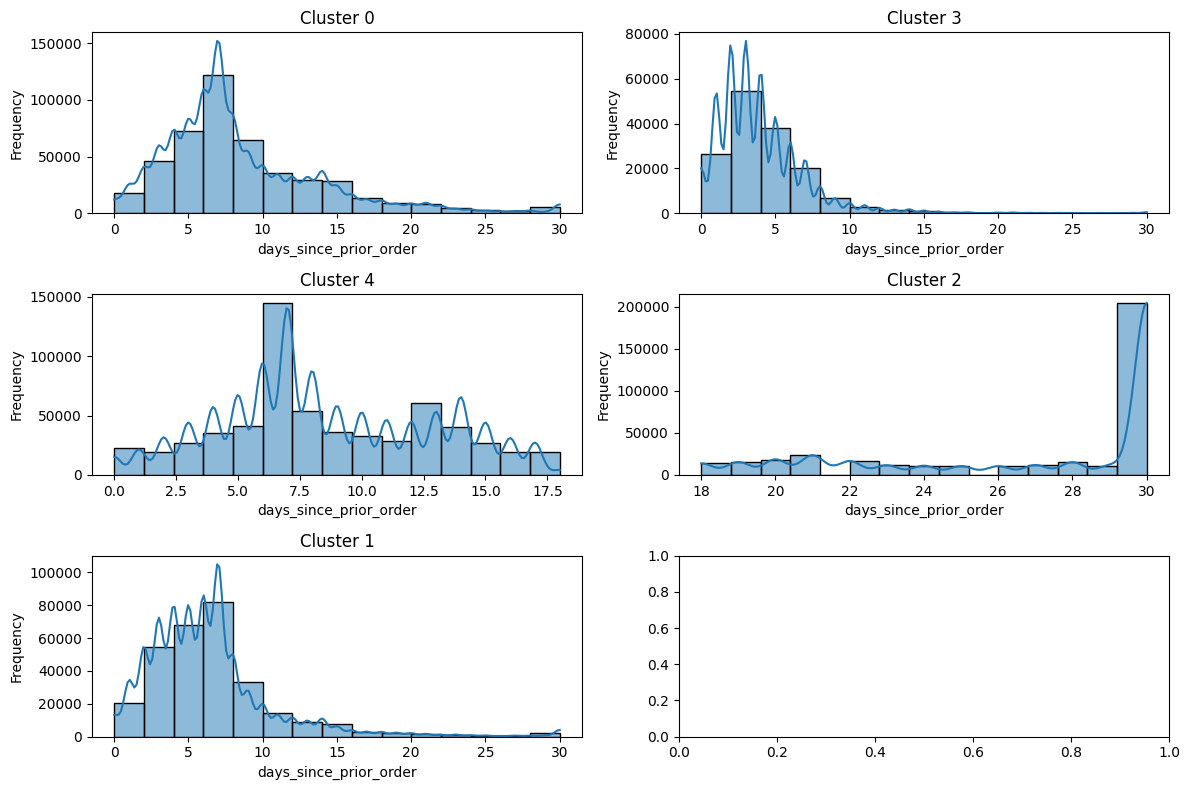

In [24]:
clusters = df['Clusters_4'].unique()
n_clusters = len(clusters)

n_cols = 2
n_rows = math.ceil(n_clusters / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 8))

for i, cluster in enumerate(clusters):
    row = i // n_cols
    col = i % n_cols
    sns.histplot(df[df['Clusters_4'] == cluster]['days_since_prior_order'], kde=True, bins=15, ax=axes[row, col])
    axes[row, col].set_title(f'Cluster {cluster}')
    axes[row, col].set_xlabel('days_since_prior_order')
    axes[row, col].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

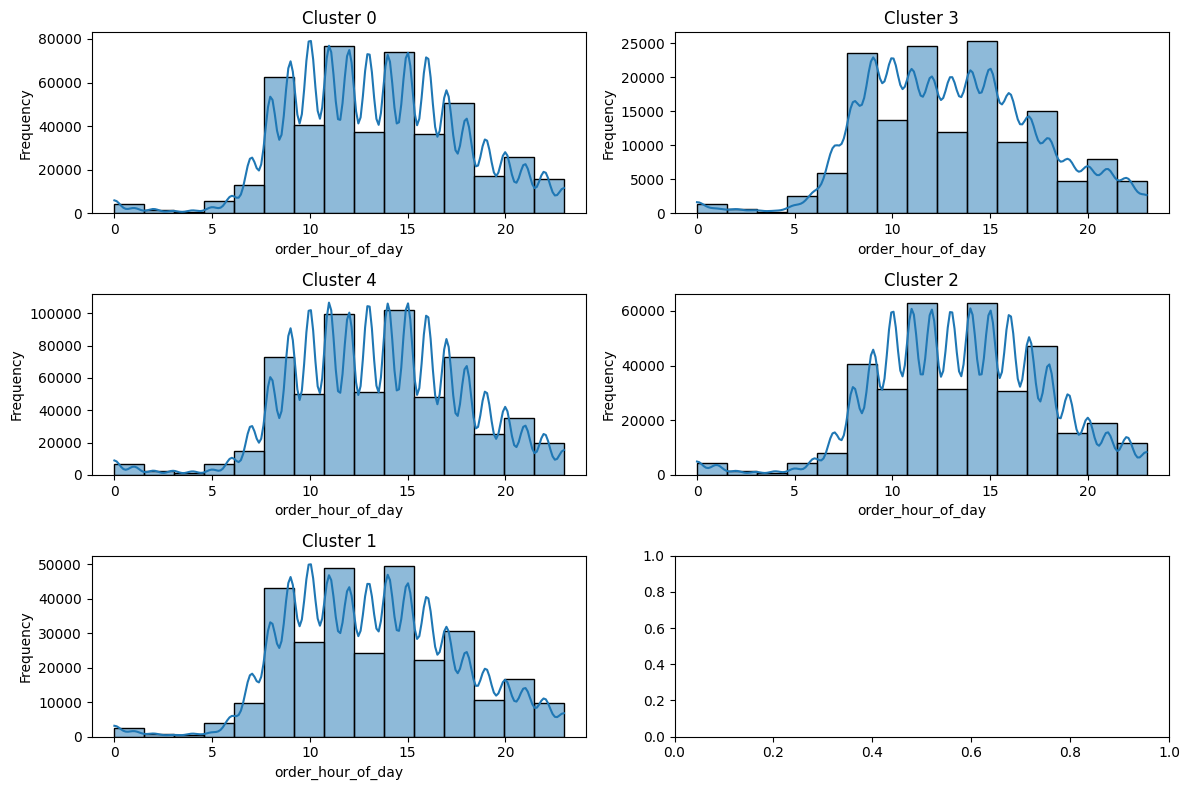

In [25]:
clusters = df['Clusters_4'].unique()
n_clusters = len(clusters)

n_cols = 2
n_rows = math.ceil(n_clusters / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 8))

for i, cluster in enumerate(clusters):
    row = i // n_cols
    col = i % n_cols
    sns.histplot(df[df['Clusters_4'] == cluster]['order_hour_of_day'], kde=True, bins=15, ax=axes[row, col])
    axes[row, col].set_title(f'Cluster {cluster}')
    axes[row, col].set_xlabel('order_hour_of_day')
    axes[row, col].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

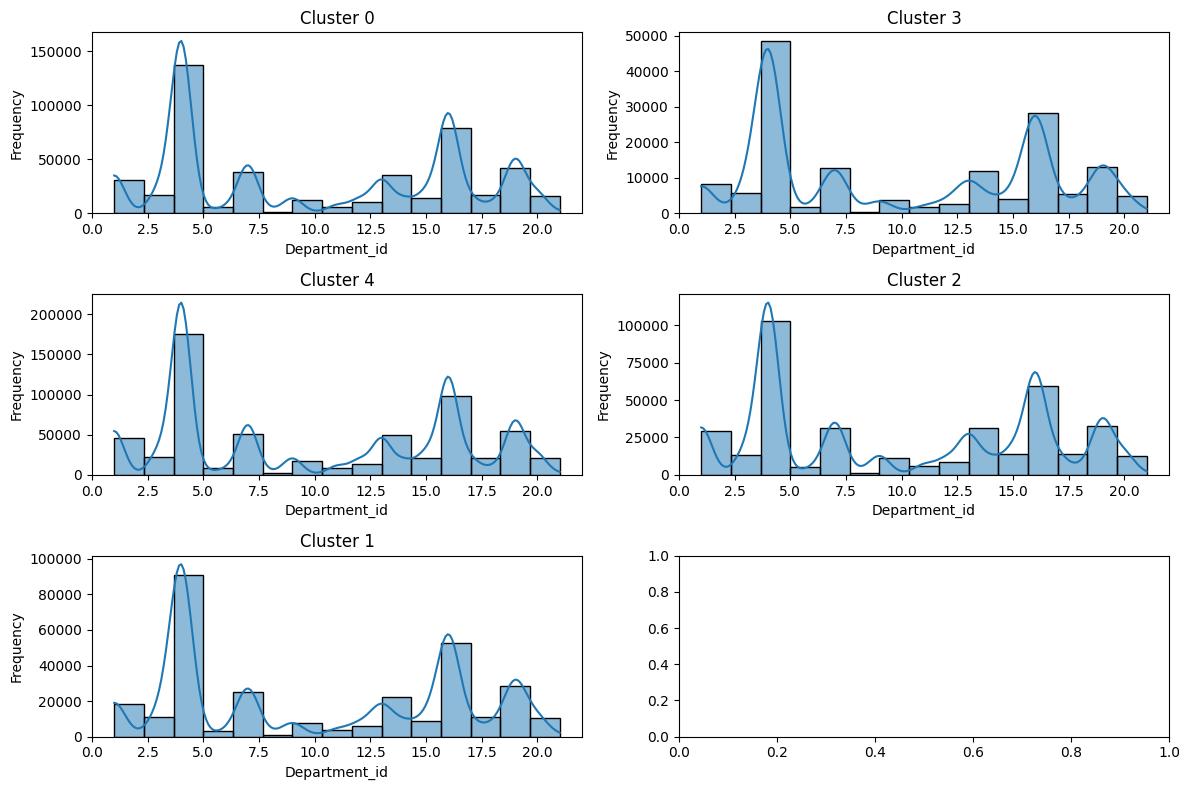

In [26]:
clusters = df['Clusters_4'].unique()
n_clusters = len(clusters)

n_cols = 2
n_rows = math.ceil(n_clusters / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 8))

for i, cluster in enumerate(clusters):
    row = i // n_cols
    col = i % n_cols
    sns.histplot(df[df['Clusters_4'] == cluster]['department_id'], kde=True, bins=15, ax=axes[row, col])
    axes[row, col].set_title(f'Cluster {cluster}')
    axes[row, col].set_xlabel('Department_id')
    axes[row, col].set_ylabel('Frequency')

plt.tight_layout()
plt.show()